In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
df_datos = pd.read_csv("../data/datosProyecto.csv")
df_datos

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,6,26578,11917.0,101.43,Jueves,06/20/2024 06:30:00 PM,10.18
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,6,60724,28336.0,265.63,Domingo,06/30/2024 08:00:00 PM,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,9,35746,8582.0,92.14,martes,09/24/2024 06:30:00 PM,17.22
4587,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,9,1632356,385301.0,3355.10,martes,09/24/2024 01:00:00 PM,24.00
4588,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,9,45482,12302.0,138.16,lunes,09/16/2024 12:30:00 PM,14.25
4589,99,VICHADA,99001,PUERTO CARREÑO,99001000,PUERTO CARREÑO (PUERTO CARREÑO - VICHADA),2024,9,2506803,703817.0,5147.12,jueves,09/12/2024 01:45:00 PM,24.00


#Exploracion Básica


In [114]:
# Ver las primeras filas 

primeras_filas=df_datos.head()
primeras_filas

## los datos de las primeras fillas nos indican que 
## | **Columna**                | **Descripción**                                                                                         |
## | -------------------------- | ------------------------------------------------------------------------------------------------------- |
## | `ID DEPARTAMENTO`          | Código numérico del departamento (por ejemplo, 91 = Amazonas).                                          |
## | `DEPARTAMENTO`             | Nombre del departamento.                                                                                |
## | `ID MUNICIPIO`             | Código DANE del municipio.                                                                              |
## | `MUNICIPIO`                | Nombre del municipio.                                                                                   |
## | `ID LOCALIDAD`             | Código único para cada localidad (combinación de municipio y localidad).                                |
## | `LOCALIDAD`                | Nombre de la localidad con contexto (ej. "LETICIA (LETICIA - AMAZONAS)").                               |
## | `AÑO SERVICIO`             | Año del registro del consumo de energía.                                                                |
## | `MES SERVICIO`             | Mes del registro del consumo de energía.                                                                |
## | `ENERGÍA ACTIVA`           | Cantidad total de energía activa consumida en el mes (en kWh).                                          |
## | `ENERGÍA REACTIVA`         | Cantidad de energía reactiva consumida (en kVARh), relacionada con la eficiencia del sistema eléctrico. |
## | `POTENCIA MÁXIMA`          | Potencia máxima registrada en el mes (en kW).                                                           |
## | `DÍA DE DEMANDA MÁXIMA`    | Día de la semana en que ocurrió el pico de consumo.                                                     |
## | `FECHA DE DEMANDA MÁXIMA`  | Fecha y hora exacta del momento de mayor demanda energética.                                            |
## | `PROMEDIO DIARIO EN HORAS` | Promedio de horas al día en las que hubo servicio de energía eléctrica en esa localidad durante el mes. |


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,6,26578,11917.0,101.43,Jueves,06/20/2024 06:30:00 PM,10.18
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,6,60724,28336.0,265.63,Domingo,06/30/2024 08:00:00 PM,9.40


In [115]:
# Tamaño del dataset
 
tamaño_dataset=df_datos.shape
tamaño_dataset

# en este caso el numero de filas que tiene nuestro archivo es 4591 y columnnas 14 

(4591, 14)

In [116]:
# Nombre de Columnas 

nombres_columnas=df_datos.columns
nombres_columnas

# como observamos nuestros datos estan catalogados de la siguiente manera y se observa un error en el apartado de departamento 

Index(['ID DEPATAMENTO', 'DEPARTAMENTO', 'ID MUNICIPIO', 'MUNICIPIO',
       'ID LOCALIDAD', 'LOCALIDAD', 'AÑO SERVICIO', 'MES SERVICIO',
       'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA',
       'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA',
       'PROMEDIO DIARIO EN HORAS'],
      dtype='object')

In [117]:
# Correcion apartado ID DEPARTAMENTO ( RENOMBRAR)

df_datos.rename(columns={'ID DEPATAMENTO':'ID DEPARTAMENTO'}, inplace=True)

In [118]:
 # Tipo de cada Columna 

tipo_cd_columna=df_datos.dtypes
tipo_cd_columna

ID DEPARTAMENTO               int64
DEPARTAMENTO                 object
ID MUNICIPIO                  int64
MUNICIPIO                    object
ID LOCALIDAD                  int64
LOCALIDAD                    object
AÑO SERVICIO                  int64
MES SERVICIO                  int64
ENERGÍA ACTIVA                int64
ENERGÍA REACTIVA            float64
POTENCIA MÁXIMA             float64
DÍA DE DEMANDA MÁXIMA        object
FECHA DE DEMANDA MÁXIMA      object
PROMEDIO DIARIO EN HORAS    float64
dtype: object

In [119]:
# Resumen Estadistico 

resumen_estadistico=df_datos.describe()
resumen_estadistico

,ID DEPARTAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,4591.000000,4591.000000,4.591000e+03,4591.000000,4591.000000,4.591000e+03,4.591000e+03,4591.000000,4591.000000
mean,44.947288,45341.840775,4.534189e+07,2021.963842,6.477020,3.692386e+05,1.085336e+05,715.421464,12.065265
std,28.547393,28505.810987,2.850581e+07,1.410511,3.495385,1.812247e+06,4.896188e+05,3140.805719,10.467295
min,0.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27.000000,27001.000000,2.700103e+07,2021.000000,3.000000,4.950500e+03,1.984000e+03,31.555000,6.280000
50%,27.000000,27615.000000,2.761591e+07,2022.000000,7.000000,1.229200e+04,4.962000e+03,64.800000,8.590000
75%,52.000000,52835.000000,5.283515e+07,2023.000000,9.000000,8.346300e+04,2.987500e+04,218.940000,19.145000
max,99.000000,99773.000000,9.977300e+07,2024.000000,12.000000,2.062092e+07,5.435213e+06,34290.650000,508.000000


In [120]:
# ANALISIS DE LOS DATOS ARROJADOS 

# METRICA	     SIGNIFICADO

# count	         Cantidad de datos no nulos
# mean	         Promedio
# std        	 Desviación estándar (variabilidad de los datos)
# min	         Valor mínimo
# 25%	         Primer cuartil (percentil 25)
# 50%	         Mediana (percentil 50)
# 75%	         Tercer cuartil (percentil 75)
# max	         Valor máximo

In [121]:
# Valores Unicos por columna 

valores_unicos_columna=df_datos.nunique()
valores_unicos_columna

ID DEPARTAMENTO               19
DEPARTAMENTO                  26
ID MUNICIPIO                  53
MUNICIPIO                     95
ID LOCALIDAD                 153
LOCALIDAD                    327
AÑO SERVICIO                   5
MES SERVICIO                  12
ENERGÍA ACTIVA              4272
ENERGÍA REACTIVA            3990
POTENCIA MÁXIMA             3370
DÍA DE DEMANDA MÁXIMA         16
FECHA DE DEMANDA MÁXIMA     4154
PROMEDIO DIARIO EN HORAS    1288
dtype: int64

In [122]:
#Clasificacion de las variables 

categoricas=df_datos.select_dtypes(include='object').columns
numericas=df_datos.select_dtypes(include=['int64','float64']).columns

print("Variables categóricas:", list(categoricas))
print("Variables numéricas:", list(numericas))

Variables categóricas: ['DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD', 'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA']
Variables numéricas: ['ID DEPARTAMENTO', 'ID MUNICIPIO', 'ID LOCALIDAD', 'AÑO SERVICIO', 'MES SERVICIO', 'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA', 'POTENCIA MÁXIMA', 'PROMEDIO DIARIO EN HORAS']


In [123]:
# Limpiar espacios antes y después de los nombres de columnas
df_datos.columns = df_datos.columns.str.strip()

In [124]:
# Resumen Estadistico de las variables numericas 

estadistico_numerico=df_datos[numericas].describe()
estadistico_numerico

,ID DEPARTAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,4591.000000,4591.000000,4.591000e+03,4591.000000,4591.000000,4.591000e+03,4.591000e+03,4591.000000,4591.000000
mean,44.947288,45341.840775,4.534189e+07,2021.963842,6.477020,3.692386e+05,1.085336e+05,715.421464,12.065265
std,28.547393,28505.810987,2.850581e+07,1.410511,3.495385,1.812247e+06,4.896188e+05,3140.805719,10.467295
min,0.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,27.000000,27001.000000,2.700103e+07,2021.000000,3.000000,4.950500e+03,1.984000e+03,31.555000,6.280000
50%,27.000000,27615.000000,2.761591e+07,2022.000000,7.000000,1.229200e+04,4.962000e+03,64.800000,8.590000
75%,52.000000,52835.000000,5.283515e+07,2023.000000,9.000000,8.346300e+04,2.987500e+04,218.940000,19.145000
max,99.000000,99773.000000,9.977300e+07,2024.000000,12.000000,2.062092e+07,5.435213e+06,34290.650000,508.000000


In [125]:
# Frecuencia de Categorias

for col in categoricas:
     print(f"\nFrecuencia en {col}:\n", df_datos[col].value_counts())


Frecuencia en DEPARTAMENTO:
 DEPARTAMENTO
CHOCÓ                                                       1243
NARIÑO                                                       859
CAUCA                                                        676
CAQUETÁ                                                      212
VICHADA                                                      209
VAUPÉS                                                       168
VALLE DEL CAUCA                                              164
AMAZONAS                                                     161
BOLÍVAR                                                      148
GUAINÍA                                                      112
CHOCO                                                        102
ANTIOQUIA                                                     95
PUTUMAYO                                                      89
ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA      65
MAGDALENA                                      

In [126]:
# Datos maximos y minimos

max_EA = df_datos["ENERGÍA ACTIVA"].max()
min_EA = df_datos["ENERGÍA ACTIVA"].min()
print("Dato Maximo de Energía Activa:", max_EA)
print("Dato Minimo de Energía Activa:", min_EA)
print("")
max_ER = df_datos["ENERGÍA REACTIVA"].max()
min_ER = df_datos["ENERGÍA REACTIVA"].min()
print("Dato Maximo de Energía Reactiva:", max_ER)
print("Dato Minimo de Energía Reactiva:", min_ER)
print("")
min_PM = df_datos["POTENCIA MÁXIMA"].min()
max_PM = df_datos["POTENCIA MÁXIMA"].max()
print("Dato Maximo de Potencia Maxima:", max_PM)
print("Dato Minimo de Potencia Maxima:", min_PM)
print("")
min_PH = df_datos["PROMEDIO DIARIO EN HORAS"].min()
max_PH = df_datos["PROMEDIO DIARIO EN HORAS"].max()
print("Dato Maximo de Promedio Diario En Horas:", max_PH)
print("Dato Minimo de Promedio Diario En Horas:", min_PH)

Dato Maximo de Energía Activa: 20620916
Dato Minimo de Energía Activa: 0

Dato Maximo de Energía Reactiva: 5435213.0
Dato Minimo de Energía Reactiva: 0.0

Dato Maximo de Potencia Maxima: 34290.65
Dato Minimo de Potencia Maxima: 0.0

Dato Maximo de Promedio Diario En Horas: 508.0
Dato Minimo de Promedio Diario En Horas: 0.0


In [127]:
#Valores Nulos 

valores_nulos=df_datos.isnull().sum()
valores_nulos

ID DEPARTAMENTO             0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       1
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64

In [128]:
# Datos nulos

print("1.",  df_datos ["ID DEPARTAMENTO"].isnull().values.any())
print("2.",  df_datos ["DEPARTAMENTO"].isnull().values.any())
print("3.",  df_datos ["ID LOCALIDAD"].isnull().values.any())
print("4.",  df_datos ["LOCALIDAD"].isnull().values.any())
print("5.",  df_datos ["AÑO SERVICIO"].isnull().values.any())
print("6.",  df_datos ["MES SERVICIO"].isnull().values.any())
print("7.",  df_datos ["ENERGÍA ACTIVA"].isnull().values.any())
print("8.",  df_datos ["ENERGÍA REACTIVA"].isnull().values.any())
print("9.",  df_datos ["POTENCIA MÁXIMA"].isnull().values.any())
print("10.", df_datos ["DÍA DE DEMANDA MÁXIMA"].isnull().values.any()) # Solo acá hay valores nulos
print("11.", df_datos ["FECHA DE DEMANDA MÁXIMA"].isnull().values.any())
print("12.", df_datos ["PROMEDIO DIARIO EN HORAS"].isnull().values.any())
print("13.", df_datos ["ID MUNICIPIO"].isnull().values.any())
print("14.", df_datos ["MUNICIPIO"].isnull().values.any()) 

1. False
2. False
3. False
4. False
5. False
6. False
7. False
8. False
9. False
10. True
11. False
12. False
13. False
14. False


In [129]:
# Cuantos valores nulos hay

df_datos["DÍA DE DEMANDA MÁXIMA"].isnull().sum() # Solo hay 1 valor nulo
df_datos[df_datos["DÍA DE DEMANDA MÁXIMA"].isna()] # Fila donde está el valor nulo
# Nota: la fecha de demanda maxima dice 07/20/2024, creo yo que ese debe ser el día que debería estar en el dato nulo.
# Solo sería buscar que día fue y llenarlo en el data frame
# Nota 2: El 20 de julio de 2024 fue un sábado.

,ID DEPARTAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
114,27,CHOCÓ,27099,BOJAYÁ,27099002,LA LOMA DE BOJAYÁ (BOJAYÁ (BELLAVISTA) - CHOCÓ),2024,7,9539,3531.0,51.2,NaN,07/20/2024 07:30:00 PM,8.1


In [130]:
# Comprobación que solo hay un dato vacio en el dataframe
df_datos.isnull().sum().sum()

np.int64(1)

# CORRECIÓN DE DATOS 



In [131]:
df_datos = pd.read_csv("../data/datosProyecto.csv")


In [132]:
import pandas as pd
import unicodedata
import re

# Función para quitar tildes
def quitar_tildes(texto):
    if pd.isnull(texto):
        return texto
    texto = str(texto)
    # Normalizar a forma NFD (Canonical Decomposition Form) y filtrar caracteres no ASCII (diacríticos)
    nfkd_form = unicodedata.normalize('NFD', texto)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Función para preparar el texto para búsqueda en diccionarios (más robusta)
def preparar_clave_busqueda(texto):
    if pd.isnull(texto):
        return ""  # Retorna cadena vacía para NaN para evitar errores
    texto = str(texto)
    texto = texto.strip()  # Quitar espacios al inicio y al final
    texto = texto.lower()  # Convertir a minúsculas
    texto = quitar_tildes(texto)  # Quitar tildes
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación (deja letras, números y espacios)
    texto = re.sub(r'\s+', ' ', texto).strip()  # Reemplazar múltiples espacios por uno solo y strip final
    return texto

# Normalizar las claves de los diccionarios para que coincidan con el formato de búsqueda
def normalizar_claves_diccionario(dic):
    return {preparar_clave_busqueda(k): v for k, v in dic.items()}

# --- Diccionarios de Correcciones ----
# Los VALORES deben ser la forma final deseada.
# Las CLAVES pueden ser formas comunes o simplificadas, preparar_clave_busqueda las normalizará.

correcciones_departamento = {
    'choco': 'Chocó',
    'narino': 'Nariño',
    'caqueta': 'Caquetá',
    'guainia': 'Guainía',
    'vaupes': 'Vaupés',
    'bolivar': 'Bolívar',
    'archipielago de san andres': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'archipielago de san andres y providencia': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'archipielago de san andres providencia y santa catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'san andres y providencia': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'san andres': 'Archipiélago de San Andrés, Providencia y Santa Catalina',
    'valle del cauca': 'Valle del Cauca',
}

correcciones_municipio = {
    'timbiqui': 'Timbiquí',
    'lopez de micay': 'López de Micay',
    'cienaga': 'Ciénaga',
    'inirida': 'Inírida',
    'mitu': 'Mitú',
    'san andres de tumaco': 'San Andrés de Tumaco',
    'tumaco': 'Tumaco',
    'alto baudo pie de pato': 'Alto Baudó (Pie de Pato)',
    'medio atrato bete': 'Medio Atrato (Beté)',
    'vigia del fuerte': 'Vigía del Fuerte',
    'bajo baudo pizarro': 'Bajo Baudó (Pizarro)',
    'quibdo': 'Quibdó',
    'san vicente del caguan': 'San Vicente del Caguán', 
    'nuqui': 'Nuquí', 
    'santa barbara iscuande': 'Santa Bárbara (Iscuandé)'
}

correcciones_localidad = {
    'puerto carreno puerto carreno vichada': 'Puerto Carreño (Puerto Carreño - Vichada)',
    'palmor cienaga magdalena': 'Palmor (Ciénaga - Magdalena)',
    'mitu mitu vaupes': 'Mitú (Mitú - Vaupés)',
    'leticia leticia amazonas': 'Leticia (Leticia - Amazonas)',
    'panamacito istmina choco': 'Panamacito (Istmina - Chocó)',
    'pogue bojaya choco': 'Pogue (Bojayá - Chocó)',
    'galvez buenaventura valle del cauca': 'Gálvez (Buenaventura - Valle del Cauca)',
    'guacamayas san vicente del caguan caqueta': 'Guacamayas (San Vicente del Caguán - Caquetá)',
    'ciudad mutis bahia solano choco': 'Ciudad Mutis (Bahía Solano - Chocó)',
    'san francisco acandi choco': 'San Francisco (Acandí - Chocó)',
    'cupica bahia solano choco': 'Cupicá (Bahía Solano - Chocó)',
    'el valle bahia solano choco': 'El Valle (Bahía Solano - Chocó)',
    'barranco minas barranco minas guainia': 'Barranco Minas (Barranco Minas - Guainía)', # Corregido Guainía
    'buenavista bajo baudo pizarro choco': 'Buenavista (Bajo Baudó (Pizarro) - Chocó)', # Corregido Chocó
}

correcciones_dia = {
    'sabado': 'Sábado',
    'miercoles': 'Miércoles',
    'lunes': 'Lunes',
    'martes': 'Martes',
    'jueves': 'Jueves',
    'viernes': 'Viernes',
    'domingo': 'Domingo',
}

# Normalizar claves de los diccionarios de correcciones
correcciones_departamento_norm = normalizar_claves_diccionario(correcciones_departamento)
correcciones_municipio_norm = normalizar_claves_diccionario(correcciones_municipio)
correcciones_localidad_norm = normalizar_claves_diccionario(correcciones_localidad)
correcciones_dia_norm = normalizar_claves_diccionario(correcciones_dia)

# Función para aplicar correcciones y formato final
def aplicar_correcciones_y_formato_final(valor_original, correcciones_dic_norm_keys):
    if pd.isnull(valor_original):
        return valor_original # Mantener NaN

    valor_str = str(valor_original)
    clave_busqueda = preparar_clave_busqueda(valor_str)

    if clave_busqueda in correcciones_dic_norm_keys:
        return correcciones_dic_norm_keys[clave_busqueda] # Retornar el valor corregido exacto
    else:
        # Fallback: quitar espacios y aplicar formato de título al string original
        return valor_str.strip().title()

# Carga de Datos 
try:
    
    df_datos = pd.read_csv("../data/datosProyecto.csv")

except FileNotFoundError:
    print("Error: El archivo 'datosProyecto.csv' no fue encontrado. Verifica la ruta.")
    df_datos = pd.DataFrame() 
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    df_datos = pd.DataFrame()

if not df_datos.empty:
    # Columnas a procesar
    columnas_a_corregir = {
        'DEPARTAMENTO': correcciones_departamento_norm,
        'MUNICIPIO': correcciones_municipio_norm,
        'LOCALIDAD': correcciones_localidad_norm,
        'DÍA DE DEMANDA MÁXIMA': correcciones_dia_norm,
    }

    # Aplicar correcciones
    for col, correcciones_dic in columnas_a_corregir.items():
        if col in df_datos.columns:
            df_datos[col] = df_datos[col].apply(lambda x: aplicar_correcciones_y_formato_final(x, correcciones_dic))
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

    # Convertir la columna de fecha a datetime
    if 'FECHA DE DEMANDA MÁXIMA' in df_datos.columns:
        df_datos['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df_datos['FECHA DE DEMANDA MÁXIMA'], errors='coerce')
    else:
        print("Advertencia: La columna 'FECHA DE DEMANDA MÁXIMA' no se encontró en el DataFrame.")

    # --- Mostrar Frecuencias para Verificar ---
    print("Frecuencias después de la limpieza:\n")

    for col in ['DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD', 'DÍA DE DEMANDA MÁXIMA', 'FECHA DE DEMANDA MÁXIMA']:
        if col in df_datos.columns:
            print(f"Frecuencia en {col}:")
            print(df_datos[col].value_counts(dropna=False)) 
            print("-" * 30)
        else:
            print(f"Advertencia: La columna '{col}' no se encontró para mostrar frecuencias.")

    # Ejemplo: Mostrar las primeras filas del DataFrame modificado
    print("\nPrimeras filas del DataFrame procesado:")
    print(df_datos.head())
else:
    print("El DataFrame está vacío. No se realizaron operaciones de limpieza o visualización de frecuencias.")



/tmp/ipykernel_37536/1983165863.py:144: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_datos['FECHA DE DEMANDA MÁXIMA'] = pd.to_datetime(df_datos['FECHA DE DEMANDA MÁXIMA'], errors='coerce')


Frecuencias después de la limpieza:

Frecuencia en DEPARTAMENTO:
DEPARTAMENTO
Chocó                                                       1345
Nariño                                                       859
Cauca                                                        676
Caquetá                                                      215
Vichada                                                      209
Vaupés                                                       170
Valle del Cauca                                              164
Amazonas                                                     161
Bolívar                                                      151
Guainía                                                      114
Archipiélago de San Andrés, Providencia y Santa Catalina      95
Antioquia                                                     95
Putumayo                                                      89
Magdalena                                                     59
Meta        

In [133]:
#Valores Nulos 2

valores_nulos=df_datos.isnull().sum()
valores_nulos




ID DEPATAMENTO              0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       1
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64

In [134]:
# Valor nullo en DÍA DE DEMANDA MÁXIMA
df_datos[df_datos['DÍA DE DEMANDA MÁXIMA'].isnull()]


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
114,27,Chocó,27099,Bojayá,27099002,La Loma De Bojayá (Bojayá (Bellavista) - Chocó),2024,7,9539,3531.0,51.2,NaN,2024-07-20 19:30:00,8.1


In [135]:
# eliminando valor nullo 

df_datos = df_datos.dropna(subset=['DÍA DE DEMANDA MÁXIMA'])


In [136]:
#Errores en el df 

errores = df_datos[df_datos['PROMEDIO DIARIO EN HORAS'] > 24][[
    'ID LOCALIDAD', 'DEPARTAMENTO', 'MUNICIPIO', 'LOCALIDAD',
    'AÑO SERVICIO', 'ENERGÍA ACTIVA', 'ENERGÍA REACTIVA',
    'POTENCIA MÁXIMA', 'PROMEDIO DIARIO EN HORAS'
]]
print(errores)

print(f"Total registros con error: {errores.shape[0]}")


      ID LOCALIDAD DEPARTAMENTO            MUNICIPIO  \
531       19809007        Cauca             Timbiquí   
1061       5873002    Antioquia     Vigía del Fuerte   
1276      52427913       Nariño                Magüí   
2858      27099005        Chocó  Bojayá (Bellavista)   

                                  LOCALIDAD  AÑO SERVICIO  ENERGÍA ACTIVA  \
531             San Jose (Timbiquí - Cauca)          2023            7195   
1061  Vegáez (Vigía Del Fuerte - Antioquia)          2023            4117   
1276               La Isla (Magüí - Nariño)          2023             129   
2858   Napipí (Bojayá (Bellavista) - Chocó)          2021           11897   

      ENERGÍA REACTIVA  POTENCIA MÁXIMA  PROMEDIO DIARIO EN HORAS  
531             4792.0            38.54                     38.54  
1061             807.0            52.70                    508.00  
1276              62.0             6.55                     78.00  
2858            3596.0            60.80                     7

In [137]:
# Correcion apartado ID DEPARTAMENTO ( RENOMBRAR)

df_datos.rename(columns={'ID DEPATAMENTO':'ID DEPARTAMENTO'}, inplace=True)

In [138]:
# Eliminar registros con PROMEDIO DIARIO EN HORAS mayor a 24
df_datos[df_datos['PROMEDIO DIARIO EN HORAS'] <= 24]

,ID DEPARTAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,Amazonas,91001,Leticia,91001000,Leticia (Leticia - Amazonas),2024,6,3994102,1010671.0,7824.51,Jueves,2024-06-20 15:30:00,24.00
1,91,Amazonas,91540,Puerto Nariño,91540000,Puerto Nariño (Puerto Nariño - Amazonas),2024,6,127838,40378.0,256.00,Miércoles,2024-06-05 18:15:00,24.00
2,91,Amazonas,91798,Tarapaca (Anm),91798000,Tarapaca (Tarapaca (Anm) - Amazonas),2024,6,26578,11917.0,101.43,Jueves,2024-06-20 18:30:00,10.18
3,88,"Archipiélago de San Andrés, Providencia y Sant...",88564,Providencia,88564000,Providencia (Providencia - Archipiélago De San...,2024,6,1284196,274864.0,2241.56,Miércoles,2024-06-12 14:15:00,24.00
4,13,Bolívar,13001,Cartagena De Indias,13001007,Isla Fuerte (Cartagena De Indias - Bolívar),2024,6,60724,28336.0,265.63,Domingo,2024-06-30 20:00:00,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,97,Vaupés,97161,Carurú,97161000,Carurú (Carurú - Vaupés),2024,9,35746,8582.0,92.14,Martes,2024-09-24 18:30:00,17.22
4587,97,Vaupés,97001,Mitú,97001000,Mitú (Mitú - Vaupés),2024,9,1632356,385301.0,3355.10,Martes,2024-09-24 13:00:00,24.00
4588,97,Vaupés,97666,Taraira,97666000,Taraira (Taraira - Vaupés),2024,9,45482,12302.0,138.16,Lunes,2024-09-16 12:30:00,14.25
4589,99,Vichada,99001,Puerto Carreño,99001000,Puerto Carreño (Puerto Carreño - Vichada),2024,9,2506803,703817.0,5147.12,Jueves,2024-09-12 13:45:00,24.00


In [144]:
#Limitar todos los valores al máximo de 24 horas para no tener errores en el resumen estadistico 

df_datos["PROMEDIO DIARIO EN HORAS"] = df_datos["PROMEDIO DIARIO EN HORAS"].clip(upper=24)

In [139]:
#Eliminar registros donde DÍA DE DEMANDA MÁXIMA esté nulo
df_datos = df_datos.dropna(subset=['DÍA DE DEMANDA MÁXIMA'])

In [140]:
# Verificacion de datos 

# Verificar si quedan valores nulos
print("Valores nulos por columna:\n", df_datos.isnull().sum())

# Verificar los tipos de datos
print("\nTipos de datos:\n", df_datos.dtypes)

# Análisis estadístico limpio
print("\nAnálisis estadístico:\n", df_datos.describe(include='all'))

Valores nulos por columna:
 ID DEPARTAMENTO             0
DEPARTAMENTO                0
ID MUNICIPIO                0
MUNICIPIO                   0
ID LOCALIDAD                0
LOCALIDAD                   0
AÑO SERVICIO                0
MES SERVICIO                0
ENERGÍA ACTIVA              0
ENERGÍA REACTIVA            0
POTENCIA MÁXIMA             0
DÍA DE DEMANDA MÁXIMA       0
FECHA DE DEMANDA MÁXIMA     0
PROMEDIO DIARIO EN HORAS    0
dtype: int64

Tipos de datos:
 ID DEPARTAMENTO                      int64
DEPARTAMENTO                        object
ID MUNICIPIO                         int64
MUNICIPIO                           object
ID LOCALIDAD                         int64
LOCALIDAD                           object
AÑO SERVICIO                         int64
MES SERVICIO                         int64
ENERGÍA ACTIVA                       int64
ENERGÍA REACTIVA                   float64
POTENCIA MÁXIMA                    float64
DÍA DE DEMANDA MÁXIMA               object
FECHA

In [146]:
#Resumen estadistico 2 


df_datos.describe()


,ID DEPARTAMENTO,ID MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
count,4590.000000,4590.000000,4.590000e+03,4590.000000,4590.000000,4.590000e+03,4.590000e+03,4590.000000,4590,4590.000000
mean,44.951198,45345.815251,4.534587e+07,2021.963399,6.476906,3.693170e+05,1.085565e+05,715.566174,2022-06-18 09:01:07.071895552,11.935205
min,0.000000,5873.000000,5.873000e+06,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,2020-01-02 19:30:00,0.000000
25%,27.000000,27001.000000,2.700103e+07,2021.000000,3.000000,4.948750e+03,1.983000e+03,31.552500,2021-03-31 01:30:00,6.280000
50%,27.000000,27615.000000,2.761592e+07,2022.000000,7.000000,1.230950e+04,4.966500e+03,64.800000,2022-05-27 18:52:30,8.590000
75%,52.000000,52835.000000,5.283515e+07,2023.000000,9.000000,8.346350e+04,2.989100e+04,218.940000,2023-09-08 19:07:30,19.147500
max,99.000000,99773.000000,9.977300e+07,2024.000000,12.000000,2.062092e+07,5.435213e+06,34290.650000,2024-12-31 21:00:00,24.000000
std,28.549274,28507.644488,2.850764e+07,1.410345,3.495758,1.812437e+06,4.896697e+05,3141.132604,NaN,7.362253


In [142]:
print(df_datos.dtypes)


ID DEPARTAMENTO                      int64
DEPARTAMENTO                        object
ID MUNICIPIO                         int64
MUNICIPIO                           object
ID LOCALIDAD                         int64
LOCALIDAD                           object
AÑO SERVICIO                         int64
MES SERVICIO                         int64
ENERGÍA ACTIVA                       int64
ENERGÍA REACTIVA                   float64
POTENCIA MÁXIMA                    float64
DÍA DE DEMANDA MÁXIMA               object
FECHA DE DEMANDA MÁXIMA     datetime64[ns]
PROMEDIO DIARIO EN HORAS           float64
dtype: object


                          ENERGÍA ACTIVA  ENERGÍA REACTIVA  POTENCIA MÁXIMA  \
ENERGÍA ACTIVA                  1.000000          0.991657         0.997529   
ENERGÍA REACTIVA                0.991657          1.000000         0.990902   
POTENCIA MÁXIMA                 0.997529          0.990902         1.000000   
PROMEDIO DIARIO EN HORAS        0.215605          0.230594         0.226662   

                          PROMEDIO DIARIO EN HORAS  
ENERGÍA ACTIVA                            0.215605  
ENERGÍA REACTIVA                          0.230594  
POTENCIA MÁXIMA                           0.226662  
PROMEDIO DIARIO EN HORAS                  1.000000  


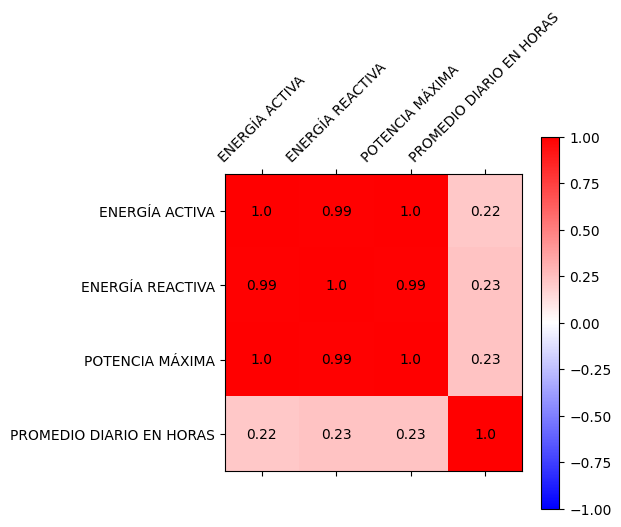

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  

df_datos = pd.read_csv("../data/datosProyecto.csv")

df_datos = df_datos.drop([
    "DEPARTAMENTO", "MUNICIPIO", "LOCALIDAD", "DÍA DE DEMANDA MÁXIMA",
    "FECHA DE DEMANDA MÁXIMA", "ID DEPATAMENTO", "ID MUNICIPIO",
    "ID LOCALIDAD", "AÑO SERVICIO", "MES SERVICIO"
], axis=1)

matrizprueba = df_datos.corr()
print(matrizprueba)

plt.matshow(matrizprueba, cmap='bwr', vmin=-1, vmax=1)
plt.xticks(range(len(df_datos.columns)), df_datos.columns, rotation=45)
plt.yticks(range(len(df_datos.columns)), df_datos.columns)

for i in range(len(matrizprueba.columns)):
    for j in range(len(matrizprueba.columns)):
        plt.text(i, j, round(matrizprueba.iloc[i, j], 2), ha='center', va='center')

plt.colorbar()
plt.show()
